In [1]:
import numpy as np
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn import linear_model

## Overall View of the dataset
- x1: Year
- x2: Freshwater withdrawals Agriculture *(% of total freshwater withdrawal)*
- x3: Freshwater withdrawals Domestic *(% of total freshwater withdrawal)*
- x4: Freshwater withdrawals Industry *(% of total freshwater withdrawal)*
- x5: Freshwater withdrawals Total *(billion cubic meters)*
- y: Level of water stress
- x6: Renewable freshwater Total *(billion cubic meters)*
- x7: Average precipitation *(mm per year)*
- x8: Population total *(in 1000s)*
- x9: GDP per capita *(constant 2015 US$)*
- x10: Population density *(people per sq. km of land area)*

In [2]:
#Reading the dataset (already cleaned)
df = pd.read_csv('data_cleaned.csv')

In [3]:
#Transforming the variable Level of Water Stress from % to relative values
df['Level of water stress'] = df['Level of water stress'].apply(lambda x: x/100)


In [4]:
#Take a look
df.shape #21x11
df.columns

df

,Year,Freshwater withdrawals Agriculture,Freshwater withdrawals Domestic,Freshwater withdrawals Industry,Freshwater withdrawals Total,Level of water stress,Renewable freshwater Total,Average precipitation,Population total,GDP per capita,Population density
0,2000,63.52,31.85,4.63,7.75,0.0116,2145,2612,39215135,4003.99,35.34
1,2001,61.88,30.92,7.21,8.25,0.0123,2145,3240,39837875,4007.53,35.91
2,2002,60.42,30.10,9.48,8.75,0.0131,2145,3240,40454050,4045.31,36.46
3,2003,59.13,29.36,11.51,9.25,0.0139,2145,3240,41057687,4142.01,37.01
4,2004,57.97,28.70,13.33,9.76,0.0146,2145,3240,41648268,4301.04,37.54
5,2005,56.92,28.11,14.97,10.26,0.0154,2145,3240,42220940,4447.57,38.05
6,2006,55.97,27.57,16.46,10.76,0.0161,2145,3240,42772910,4685.05,38.55
7,2007,55.10,27.08,17.81,11.26,0.0169,2145,3240,43306582,4939.12,39.03
8,2008,54.31,26.63,19.05,11.77,0.0176,2145,3240,43815313,5042.06,39.49
9,2009,59.10,23.43,17.46,13.79,0.0206,2145,3240,44313917,5042.14,39.94


In [5]:
#Correlation
df.iloc[:, 1:].corr()

,Freshwater withdrawals Agriculture,Freshwater withdrawals Domestic,Freshwater withdrawals Industry,Freshwater withdrawals Total,Level of water stress,Renewable freshwater Total,Average precipitation,Population total,GDP per capita,Population density
Freshwater withdrawals Agriculture,1.000000,-0.856277,-0.749821,0.903244,0.903092,NaN,0.072598,0.851279,0.783502,0.851270
Freshwater withdrawals Domestic,-0.856277,1.000000,0.300627,-0.988898,-0.988881,NaN,-0.329503,-0.963333,-0.976908,-0.963423
Freshwater withdrawals Industry,-0.749821,0.300627,1.000000,-0.400751,-0.400495,NaN,0.284752,-0.341016,-0.196870,-0.340873
Freshwater withdrawals Total,0.903244,-0.988898,-0.400751,1.000000,0.999997,NaN,0.280329,0.961345,0.960632,0.961433
Level of water stress,0.903092,-0.988881,-0.400495,0.999997,1.000000,NaN,0.280357,0.961321,0.960623,0.961409
Renewable freshwater Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average precipitation,0.072598,-0.329503,0.284752,0.280329,0.280357,NaN,1.000000,0.375994,0.330082,0.376370
Population total,0.851279,-0.963333,-0.341016,0.961345,0.961321,NaN,0.375994,1.000000,0.945945,1.000000
GDP per capita,0.783502,-0.976908,-0.196870,0.960632,0.960623,NaN,0.330082,0.945945,1.000000,0.946007
Population density,0.851270,-0.963423,-0.340873,0.961433,0.961409,NaN,0.376370,1.000000,0.946007,1.000000


## Scaling and Dividing the dataset

In [6]:
from sklearn.preprocessing import MinMaxScaler

#Scaling with Min-Max Scaling method
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

#Dividing the dataset into X and Y (water stress level)
#I don't take into accont the variable Year
X = df_scaled.iloc[:, [1,2,3,4,6,7,8,9,10]]
Y = df_scaled.iloc[:, [5]]


In [7]:
X

,Freshwater withdrawals Agriculture,Freshwater withdrawals Domestic,Freshwater withdrawals Industry,Freshwater withdrawals Total,Renewable freshwater Total,Average precipitation,Population total,GDP per capita,Population density
0,0.290720,1.000000,0.190797,0.000000,0.0,0.0,0.000000,0.000000,0.000000
1,0.238952,0.952037,0.335578,0.023397,0.0,1.0,0.053155,0.001475,0.053977
2,0.192866,0.909747,0.462963,0.046795,0.0,1.0,0.105750,0.017216,0.106061
3,0.152146,0.871583,0.576880,0.070192,0.0,1.0,0.157274,0.057505,0.158144
4,0.115530,0.837545,0.679012,0.094057,0.0,1.0,0.207684,0.123765,0.208333
5,0.082386,0.807117,0.771044,0.117454,0.0,1.0,0.256566,0.184816,0.256629
6,0.052399,0.779268,0.854658,0.140852,0.0,1.0,0.303680,0.283761,0.303977
7,0.024937,0.753997,0.930415,0.164249,0.0,1.0,0.349233,0.389618,0.349432
8,0.000000,0.730789,1.000000,0.188114,0.0,1.0,0.392657,0.432508,0.392992
9,0.151199,0.565756,0.910774,0.282639,0.0,1.0,0.435216,0.432541,0.435606


In [8]:
Y

,Level of water stress
0,0.000000
1,0.021875
2,0.046875
3,0.071875
4,0.093750
5,0.118750
6,0.140625
7,0.165625
8,0.187500
9,0.281250


## Neural Network Model

In [9]:
#I convert the data into array
X_arr=X.to_numpy()
Y_arr=Y.to_numpy()

In [10]:
X_arr

array([[0.2907197 , 1.        , 0.19079686, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.23895202, 0.95203713, 0.335578  , 0.02339729, 0.        ,
        1.        , 0.0531551 , 0.00147493, 0.05397727],
       [0.19286616, 0.90974729, 0.46296296, 0.04679457, 0.        ,
        1.        , 0.10574983, 0.01721581, 0.10606061],
       [0.15214646, 0.87158329, 0.57687991, 0.07019186, 0.        ,
        1.        , 0.15727436, 0.05750546, 0.15814394],
       [0.1155303 , 0.83754513, 0.67901235, 0.09405709, 0.        ,
        1.        , 0.20768447, 0.12376465, 0.20833333],
       [0.08238636, 0.80711707, 0.77104377, 0.11745438, 0.        ,
        1.        , 0.25656592, 0.18481576, 0.25662879],
       [0.05239899, 0.77926766, 0.85465769, 0.14085166, 0.        ,
        1.        , 0.30368032, 0.28376081, 0.30397727],
       [0.02493687, 0.75399691, 0.93041526, 0.16424895, 0.        ,
        1.        , 0.34923286, 0.38961802, 0.34943182],


In [11]:
Y_arr

array([[0.      ],
       [0.021875],
       [0.046875],
       [0.071875],
       [0.09375 ],
       [0.11875 ],
       [0.140625],
       [0.165625],
       [0.1875  ],
       [0.28125 ],
       [0.378125],
       [0.471875],
       [0.56875 ],
       [0.6625  ],
       [0.75625 ],
       [0.853125],
       [0.946875],
       [0.928125],
       [0.90625 ],
       [0.959375],
       [1.      ]])

In [12]:
#Splitting the data for test and training
X_train, X_test, Y_train, Y_test = train_test_split(X_arr,Y_arr,test_size=0.2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(16, 9) (5, 9) (16, 1) (5, 1)


In [13]:
#Now I can build the neural network model with Keras:
model=tf.keras.models.Sequential() #creating a neural network model
model.add(tf.keras.layers.Flatten()),
model.add(tf.keras.layers.Dense(35, activation="relu")),
model.add(tf.keras.layers.Dense(30, activation="sigmoid")),
model.add(tf.keras.layers.Dense(25, activation="sigmoid")),
model.add(tf.keras.layers.Dense(1, activation="linear")),

model.compile(optimizer="adam",loss="mean_squared_error", metrics=["accuracy"]) #compile the model

In [14]:
#Training the model
model.fit(X_train, Y_train, epochs=450, batch_size=32, validation_data=(X_test, Y_test)) 
#validation_data control the model performances on test dataset and reduce the risk of overfitting

Epoch 1/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0625 - loss: 0.3776 - val_accuracy: 0.0000e+00 - val_loss: 0.5982
Epoch 2/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0625 - loss: 0.3446 - val_accuracy: 0.0000e+00 - val_loss: 0.5506
Epoch 3/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0625 - loss: 0.3139 - val_accuracy: 0.0000e+00 - val_loss: 0.5055
Epoch 4/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0625 - loss: 0.2857 - val_accuracy: 0.0000e+00 - val_loss: 0.4630
Epoch 5/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0625 - loss: 0.2599 - val_accuracy: 0.0000e+00 - val_loss: 0.4231
Epoch 6/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0625 - loss: 0.2366 - val_accuracy: 0.0000e+00 - val_loss: 0.3858
Epoch 7/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0625 - loss: 0.2157 - val_accuracy: 0.0000e+00 - val_loss: 0.3512
Epoch 8/450
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.0625 - loss: 0.1973 - val_ac

## Prediction of test data

In [15]:
Y_pred = model.predict(X_test)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


array([[0.18443991],
       [0.9593335 ],
       [0.5203224 ],
       [0.9747383 ],
       [0.69584394]], dtype=float32)

In [16]:
#Comparing the predictions with the test data
Y_test

array([[0.1875  ],
       [0.90625 ],
       [0.471875],
       [1.      ],
       [0.6625  ]])

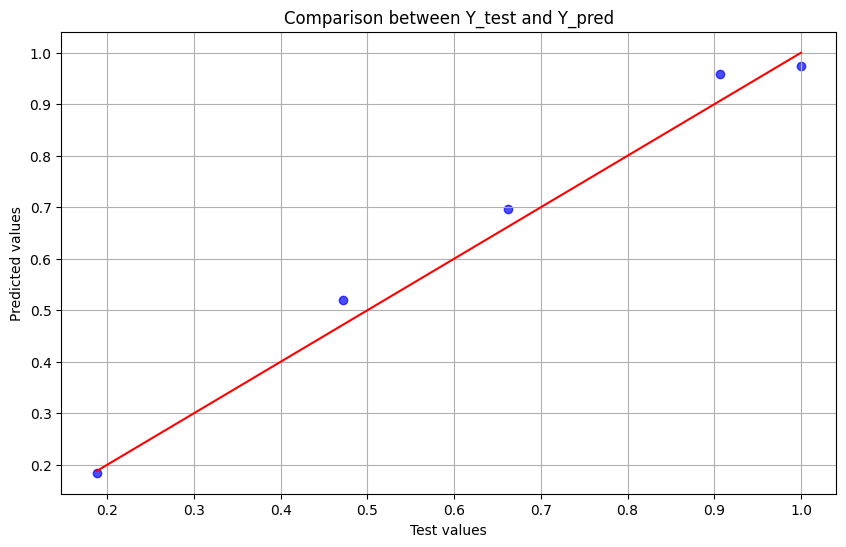

In [17]:
#Plot for the comparison of test data and predicted data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color='b')
plt.xlabel('Test values')
plt.ylabel('Predicted values')
plt.title('Comparison between Y_test and Y_pred')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red') #Line of perfect coincidence
plt.grid(True)
plt.show()

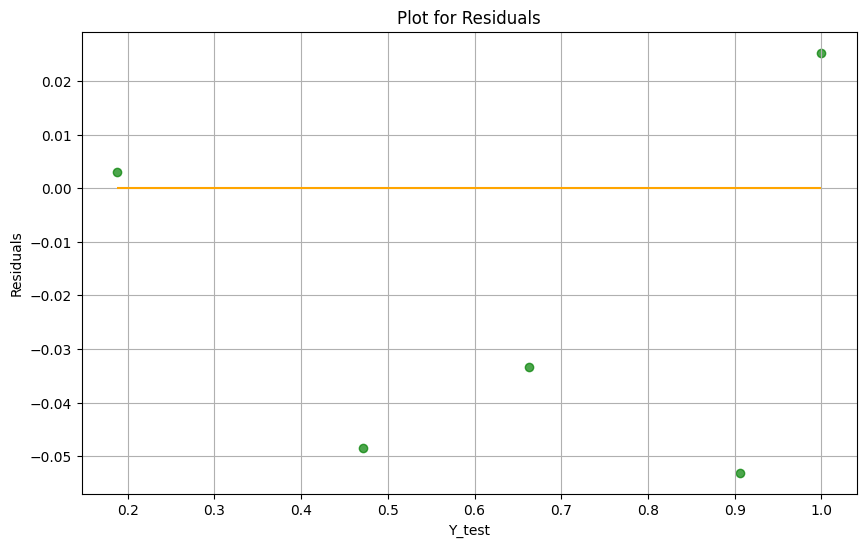

In [18]:
#Residual errors
residuals = Y_test - Y_pred

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, residuals, alpha=0.7, color='green')
plt.hlines(y=0, xmin=min(Y_test), xmax=max(Y_test), color='orange')  #Axis x=0 for reference
plt.xlabel('Y_test')
plt.ylabel('Residuals')
plt.title('Plot for Residuals')
plt.grid(True)
plt.show()

## Accuracy of the model

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Mean squared error
mse = mean_squared_error(Y_test, Y_pred)

#Mean absolute error
mae = mean_absolute_error(Y_test, Y_pred)

#R^2
r2 = r2_score(Y_test, Y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R^2 score: ", r2)

Mean squared error:  0.001384868056922153
Mean absolute error:  0.03263931691646584
R^2 score:  0.9840401275537476


# Important points from now:

- Analyze the performance of the model through validation.
- Prediction of Water Stress Level by 2030.

## Prediction through validation set

Since the SGD are scheduled for 2030, it makes sense to try to predict future data for this year through a validation dataset, with future values and estimation of the variables. The validation dataset is useful to see how the model is trained with future values (not observed).

So, in this final part of the analysis, I try to estimate the independent variables for 2030. I use the technique of *Extrapolation* of data, that is the process of projection of data beyond the years observed. To extrapolate the variables I will use the linear regression approach.

In [20]:
#Defining the function to extrapolate variables
def extrapolate_fun(df, variables):
    years = df['Year'].values
    val = df[variables].values

    #Linear regression to identify the tendency
    tendency = np.polyfit(years, val, deg=1)
    #Calculating variable value for 2030
    Y_2030 = np.polyval(tendency, 2030)

    return Y_2030

In [21]:
#Defining the variables for to estimate
variables = ['Freshwater withdrawals Agriculture',
             'Freshwater withdrawals Domestic',	
             'Freshwater withdrawals Industry',
             'Freshwater withdrawals Total',
             'Level of water stress',
             'Renewable freshwater Total',
             'Average precipitation',
             'Population total',
             'GDP per capita',
             'Population density']

#Creating a dictionary for the future values extrapolated
future_values = {}
for i in variables:
    future_values[i] = extrapolate_fun(df, i)

#Putting the future values into a dataframe
df_future = pd.DataFrame([future_values])
df_future['Year'] = 2030

df_future

,Freshwater withdrawals Agriculture,Freshwater withdrawals Domestic,Freshwater withdrawals Industry,Freshwater withdrawals Total,Level of water stress,Renewable freshwater Total,Average precipitation,Population total,GDP per capita,Population density,Year
0,95.137143,-0.865801,5.887662,42.448052,0.063572,2145.0,3373.212121,5.575938e+07,7969.525195,50.253117,2030


In [22]:
#Final prediction
df_future2 = df_future.iloc[:, :-1] #without 'Year'
df_future2

X_future = df_future2.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]] 
Y_future = model.predict(X_future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [23]:
scaled = scaler.fit_transform(df_future2)
scaled = pd.DataFrame(scaled, columns=df_future2.columns)
X_future = scaled.iloc[:, [0, 1, 2, 3, 5, 6, 7, 8, 9]] 
Y_future = model.predict(X_future)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [24]:
Y_future

array([[0.28426313]], dtype=float32)

## Final prediction for 2020-2035 through extrapolation approach

In [25]:
#Defining the function to extrapolate variables
def extrapolate_fun2(df, variable, start_year, end_year):
    years = df['Year'].values
    val = df[variable].values

    #Linear regression to identify the tendency
    tendency = np.polyfit(years, val, deg=1)
    
    #Calculating water stress level for the range
    years_future = np.arange(start_year, end_year + 1)
    val_future = np.polyval(tendency, years_future)

    return years_future, val_future

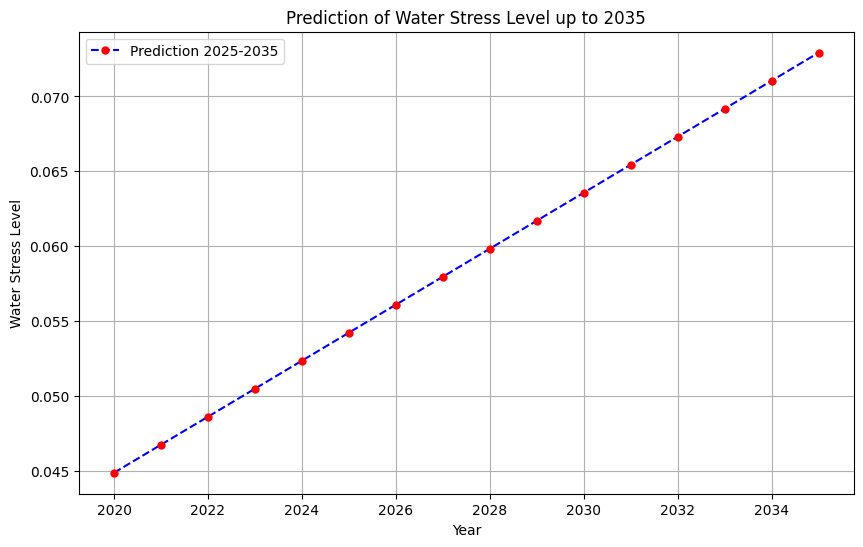

In [26]:
variable = 'Level of water stress'
start_year = 2020
end_year = 2035

years_future, Y_future2 = extrapolate_fun2(df, variable, start_year, end_year)

#Plot of future values
plt.figure(figsize=(10, 6))
plt.plot(years_future, Y_future2, marker='o', linestyle='--', color='blue', markerfacecolor='red', markeredgewidth=0, label='Prediction 2025-2035')
plt.xlabel('Year')
plt.ylabel('Water Stress Level')
plt.title('Prediction of Water Stress Level up to 2035')
plt.legend()
plt.grid(True)
plt.show()